# Project Overview: Influencer Engagement and Growth Analysis on TikTok

## Objective:
#### This project aims to analyze and gain insights into the engagement and growth patterns of influencers on TikTok, with a focus on the impact of account verification status.

## Data Simulation:
#### Simulated data has been generated to represent the activities of 20,000 TikTok users divided into two groups (A and B). The data includes various metrics such as video views, likes, comments, influence scores, verification status, follower growth, engagement rate, average watch time, reach, profile views, completion rate, and brand partnerships.

## Key Metrics:

## Video Metrics: Explore the performance of videos, including views, likes, and comments.
#### Influence Score: Evaluate the perceived impact of influencers on the platform.
#### Verification Status: Investigate differences in engagement and growth between verified and non-verified accounts.
#### Follower Growth: Analyze the increase in the number of followers over time.
#### Engagement Rate: Assess the overall engagement of users based on likes, comments, and shares.
#### Average Watch Time: Understand how long users watch influencer videos on average.
#### Reach and Impressions: Examine the distribution and visibility of influencer content.
#### Profile Views: Investigate how frequently users visit influencer profiles.
#### Completion Rate: Assess the percentage of users who watch a video to completion.
#### Brand Partnerships: Explore influencer collaborations with brands.


# Step1: Imports

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind

# Step2: Data Semulation

In [28]:


np.random.seed(42)

# Simulated data for an advanced AB test on TikTok with 10,000 users per group
num_users_per_group = 10000

data = {
    'user_id': np.arange(1, num_users_per_group * 2 + 1),
    'group': np.repeat(['A', 'B'], num_users_per_group),
    'video_views': np.random.normal(loc=1200, scale=400, size=num_users_per_group * 2),
    'video_likes': np.random.gamma(shape=10, scale=5, size=num_users_per_group * 2),
    'video_comments': np.random.poisson(lam=25, size=num_users_per_group * 2),
    'influence_score': np.random.normal(loc=50, scale=15, size=num_users_per_group * 2),
    'verification_status': np.random.choice(['Verified', 'Not Verified'], size=num_users_per_group * 2),
    'follower_growth': np.random.normal(loc=500, scale=200, size=num_users_per_group * 2),
    'engagement_rate': np.random.uniform(0.02, 0.2, size=num_users_per_group * 2),
    'average_watch_time': np.random.normal(loc=15, scale=5, size=num_users_per_group * 2),
    'reach': np.random.normal(loc=10000, scale=5000, size=num_users_per_group * 2),
    'profile_views': np.random.normal(loc=300, scale=100, size=num_users_per_group * 2),
    'completion_rate': np.random.uniform(0.5, 0.9, size=num_users_per_group * 2),
    'brand_partnerships': np.random.choice([0, 1], size=num_users_per_group * 2, p=[0.9, 0.1])
}

df_advanced_ab_test_tiktok = pd.DataFrame(data)

# Adjust metrics for verified accounts
df_advanced_ab_test_tiktok.loc[df_advanced_ab_test_tiktok['verification_status'] == 'Verified', 'video_views'] *= 1.2
df_advanced_ab_test_tiktok.loc[df_advanced_ab_test_tiktok['verification_status'] == 'Verified', 'video_likes'] *= 1.1
df_advanced_ab_test_tiktok.loc[df_advanced_ab_test_tiktok['verification_status'] == 'Verified', 'video_comments'] *= 1.15
df_advanced_ab_test_tiktok.loc[df_advanced_ab_test_tiktok['verification_status'] == 'Verified', 'influence_score'] += 10
df_advanced_ab_test_tiktok.loc[df_advanced_ab_test_tiktok['verification_status'] == 'Verified', 'follower_growth'] *= 1.2
df_advanced_ab_test_tiktok.loc[df_advanced_ab_test_tiktok['verification_status'] == 'Verified', 'engagement_rate'] *= 1.1
df_advanced_ab_test_tiktok.loc[df_advanced_ab_test_tiktok['verification_status'] == 'Verified', 'average_watch_time'] *= 1.2
df_advanced_ab_test_tiktok.loc[df_advanced_ab_test_tiktok['verification_status'] == 'Verified', 'reach'] *= 1.1
df_advanced_ab_test_tiktok.loc[df_advanced_ab_test_tiktok['verification_status'] == 'Verified', 'profile_views'] *= 1.1
df_advanced_ab_test_tiktok.loc[df_advanced_ab_test_tiktok['verification_status'] == 'Verified', 'completion_rate'] *= 1.1
df_advanced_ab_test_tiktok.loc[df_advanced_ab_test_tiktok['verification_status'] == 'Verified', 'brand_partnerships'] = 1

# Display the simulated advanced AB test data for TikTok
df_advanced_ab_test_tiktok.head(10)


,user_id,group,video_views,video_likes,video_comments,influence_score,verification_status,follower_growth,engagement_rate,average_watch_time,reach,profile_views,completion_rate,brand_partnerships
0,1,A,1678.422793,59.347587,28.75,42.602686,Verified,434.633707,0.175836,20.373540,12552.713928,415.701107,0.877704,1
1,2,A,1144.694280,52.872919,23.00,39.122402,Not Verified,527.095856,0.132122,18.059339,22949.517134,432.127948,0.510806,0
2,3,A,1459.075415,28.672574,24.00,55.081946,Not Verified,646.834496,0.087436,6.920815,10835.428634,272.003562,0.542030,1
3,4,A,2171.054331,42.746233,23.00,73.489885,Verified,761.646725,0.188392,16.506143,17323.508952,403.108328,0.717326,1
4,5,A,1327.606380,49.304606,21.85,61.301029,Verified,362.539287,0.122878,15.798873,6824.250388,399.570390,0.564083,1
5,6,A,1327.614261,99.495618,28.75,71.165979,Verified,1094.026828,0.063201,18.522581,5215.384579,231.022972,0.821147,1
6,7,A,1831.685126,39.780825,27.00,36.629695,Not Verified,822.840853,0.185781,14.747698,14854.157535,350.299619,0.843351,0
7,8,A,1506.973892,33.823675,25.00,42.706986,Not Verified,679.824927,0.104939,17.571416,9326.172020,177.661252,0.509189,0
8,9,A,1214.652295,33.395847,27.60,68.586142,Verified,377.050843,0.094768,15.487371,9356.316282,437.020388,0.684170,1
9,10,A,1700.428821,31.217672,33.35,54.553884,Verified,879.598751,0.190949,18.138287,11302.347146,330.195510,0.813865,1


In [29]:
df_advanced_ab_test_tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              20000 non-null  int32  
 1   group                20000 non-null  object 
 2   video_views          20000 non-null  float64
 3   video_likes          20000 non-null  float64
 4   video_comments       20000 non-null  float64
 5   influence_score      20000 non-null  float64
 6   verification_status  20000 non-null  object 
 7   follower_growth      20000 non-null  float64
 8   engagement_rate      20000 non-null  float64
 9   average_watch_time   20000 non-null  float64
 10  reach                20000 non-null  float64
 11  profile_views        20000 non-null  float64
 12  completion_rate      20000 non-null  float64
 13  brand_partnerships   20000 non-null  int32  
dtypes: float64(10), int32(2), object(2)
memory usage: 2.0+ MB


# Step3: Data Exploration

In [8]:
# Group by group (A and B) and calculate means for numerical variables
means_by_group = df_advanced_ab_test_tiktok.groupby('group').mean()

# Display the means
print("Means by Group (A and B):")
print(means_by_group)

Means by Group (A and B):
       user_id  video_views  video_likes  video_comments  influence_score  \
group                                                                       
A       5000.5  1318.388267    52.296529       26.808060        54.855845   
B      15000.5  1322.031600    52.599261       26.836025        55.050588   

       follower_growth  engagement_rate  average_watch_time         reach  \
group                                                                       
A           549.187146         0.116142           16.469328  10459.834636   
B           548.893720         0.115175           16.478814  10464.559746   

       profile_views  completion_rate  brand_partnerships  
group                                                      
A         313.971605         0.734402              0.5468  
B         314.172323         0.732617              0.5337  


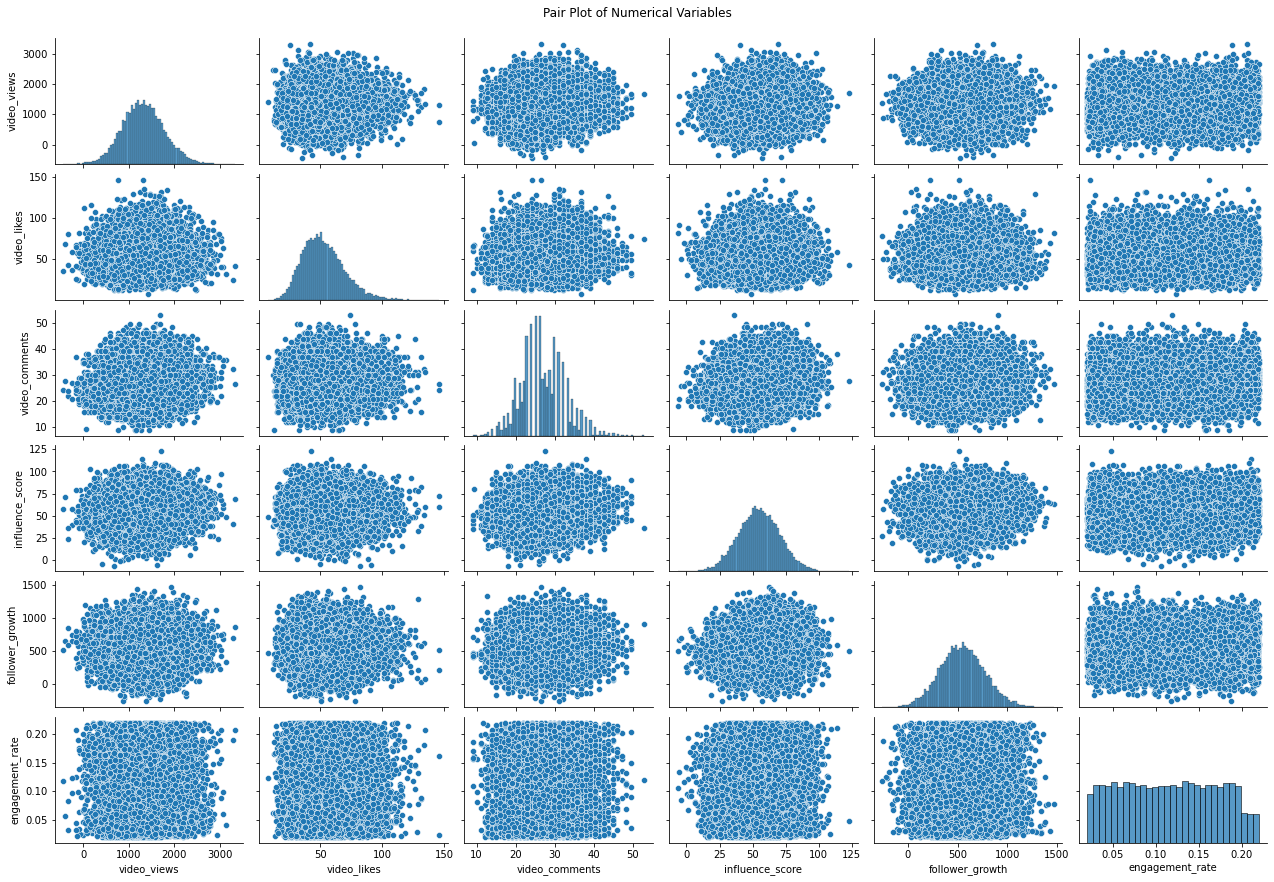

In [10]:

# Select numerical variables for the pair plot
numerical_variables = ['video_views', 'video_likes', 'video_comments', 'influence_score', 'follower_growth', 'engagement_rate']

# Create a pair plot
sns.pairplot(df_advanced_ab_test_tiktok[numerical_variables], height=2, aspect=1.5)
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()


# Step4: Hypotheses & Statistical tests 

## Primary Metric: Video views are a fundamental indicator of content reach and popularity on TikTok.

## Null Hypothesis
#### There is no significant difference in the average number of video views between verified and non-verified accounts on TikTok.

## Alternative Hypothesis:

#### There is a significant difference in the average number of video views between verified and non-verified accounts on TikTok.


#### H0: μA = μB
#### H1: μA ≠ μB

## Secondary Metric 1: Engagement rate reflects the level of interaction and interest from the audience.
## Null Hypothesis:
#### There is no significant difference in the average engagement rate between Group A and Group B on TikTok.
 
## Alternative Hypothesis:
#### There is a significant difference in the average engagement rate between Group A and Group B on TikTok.

#### H0: μA = μB
#### H1: μA ≠ μB

## Secondary Metric2: Follower growth is important for assessing the platform's ability to attract and retain new followers.
## Null Hypothesis:

#### There is no significant difference in the average follower growth between verified and non-verified accounts on 
## Alternative Hypothesis:

#### There is a significant difference in the average follower growth between verified and non-verified accounts on TikTok.

#### H0: μA = μB
#### H1: μA ≠ μB

In [19]:
from scipy.stats import ttest_ind

# Average Video Views:
group_A_data = df_advanced_ab_test_tiktok[df_advanced_ab_test_tiktok['verification_status'] == 'Verified']['video_views']
group_B_data = df_advanced_ab_test_tiktok[df_advanced_ab_test_tiktok['verification_status'] == 'Not Verified']['video_views']

t_stat, p_value = ttest_ind(group_A_data, group_B_data, equal_var=False)

print(f"Independent t-test for Average Video Views:")
print(f"Statistic: {t_stat}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis")
else:
    print("Result: Fail to reject the null hypothesis")



Independent t-test for Average Video Views:
Statistic: 38.96838854185246, p-value: 0.0
Result: Reject the null hypothesis


In [20]:


# Average Engagement Rate
group_A_data = df_advanced_ab_test_tiktok[df_advanced_ab_test_tiktok['group'] == 'A']['engagement_rate']
group_B_data = df_advanced_ab_test_tiktok[df_advanced_ab_test_tiktok['group'] == 'B']['engagement_rate']

t_stat, p_value = ttest_ind(group_A_data, group_B_data, equal_var=False)

print(f"Independent t-test for Average Engagement Rate:")
print(f"Statistic: {t_stat}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis")
else:
    print("Result: Fail to reject the null hypothesis")


Independent t-test for Average Engagement Rate:
Statistic: 1.2411864562035262, p-value: 0.2145514357939753
Result: Fail to reject the null hypothesis


In [21]:

# Follower Growth
group_A_data = df_advanced_ab_test_tiktok[df_advanced_ab_test_tiktok['verification_status'] == 'Verified']['follower_growth']
group_B_data = df_advanced_ab_test_tiktok[df_advanced_ab_test_tiktok['verification_status'] == 'Not Verified']['follower_growth']

t_stat, p_value = ttest_ind(group_A_data, group_B_data, equal_var=False)

print(f"Independent t-test for Follower Growth:")
print(f"Statistic: {t_stat}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis")
else:
    print("Result: Fail to reject the null hypothesis")


Independent t-test for Follower Growth:
Statistic: 30.852608430394845, p-value: 5.170764716156475e-204
Result: Reject the null hypothesis


# Step5: Conclusions
##### Let's summarize the findings:

## 1. Average Video Views:
#### Result: Reject the null hypothesis
#### Interpretation: There is a significant difference in the average number of video views between verified and non-verified accounts on TikTok.
## 2. Average Engagement Rate:
#### Result: Fail to reject the null hypothesis
#### Interpretation: There is no significant difference in the average engagement rate between Group A and Group B on TikTok.
## 3. Follower Growth:
#### Result: Reject the null hypothesis
#### Interpretation: There is a significant difference in the average follower growth between verified and non-verified accounts on TikTok.
## Implications and Recommendations:

#### Verified Accounts: The significant difference in video views and follower growth for verified accounts suggests that the verification status plays a crucial role in user engagement and account growth. Verified accounts may benefit from targeted strategies to maximize their reach and audience expansion.

#### Engagement Rate: While there is no significant difference in the average engagement rate between Group A and Group B, it is essential to analyze the factors influencing engagement. Exploring content quality, audience targeting, and trending topics can contribute to enhancing engagement rates.

## Limitations and Further Investigations:

#### Simulated Data: The analysis is based on simulated data, and the results may not fully represent real-world scenarios. Further investigations with actual TikTok data and a more diverse set of influencers could provide additional insights.

##### Additional Metrics: Exploring other metrics such as video likes, comments, and user demographics could offer a more comprehensive understanding of influencer performance on TikTok.